In [1]:
# Created Wikipedia tool object 
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())
print(wikipedia.description)


# Created arxiv tool
from langchain_community.tools import ArxivQueryRun
from langchain_community.utilities import ArxivAPIWrapper
arxiv_tool = ArxivQueryRun(api_wrapper = ArxivAPIWrapper())
print(arxiv_tool.description)

# tool for doing Web Searcg
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]= os.getenv("GROQ_API_KEY")
os.environ["GOOGLE_API_KEY"]= os.getenv("GOOGLE_API_KEY")

os.environ["LANGCHAIN_API_KEY"]= os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]= os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"]= os.getenv("LANGCHAIN_TRACING_V2")
os.environ["TAVILY_API_KEY"]= os.getenv("TAVILY_API_KEY")

from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()


# Define Tools 
def my_add(a:int, b:int)-> int:
    """  Addition of a and b and not multiplication
    Args:
        a(int) : first int
        b(int) : second int
    Return:
        int:
    """
    return a+b

def my_mult(a:int, b:int)-> int:
    """ Multiplication of a and b and not addition. 
    Args:
        a(int) : first int
        b(int) : second int
    Return:
        int:
    """
    return a*b

def my_div(a:int, b:int)-> float:
    """
        Divide a by b and do not do addition or multiplication

    Args:
        a: first int
        b: second int
    """
    return a/b

tools = [wikipedia,arxiv_tool,tavily,my_add,my_mult,my_div]

# Question : Can you tell me what is the recent Agentic AI updates in July 2025 ? And also can you add 10 and 20?

A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
A wrapper around Arxiv.org Useful for when you need to answer questions about Physics, Mathematics, Computer Science, Quantitative Biology, Quantitative Finance, Statistics, Electrical Engineering, and Economics from scientific articles on arxiv.org. Input should be a search query.


/var/folders/9d/7gw2rnq56ls5m4r1vbglz5r00000gn/T/ipykernel_97685/3809779533.py:28: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [2]:
# Define our LLM
from langchain_openai import ChatOpenAI
llm_openai = ChatOpenAI(model = "gpt-4o-mini")
llm_with_tools = llm_openai.bind_tools(tools)


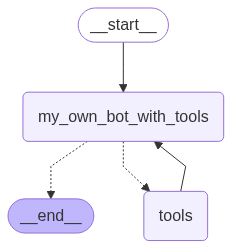

In [3]:
# Create the bot 
# Step1 - Create state for agent
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]

# Step 2: Node definitions
from langgraph.graph import StateGraph, START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from IPython.display import Image,display

# Node definitions
def my_own_bot_with_tools(state: State):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

builder = StateGraph(State)

# Add nodes
builder.add_node("my_own_bot_with_tools",my_own_bot_with_tools)
builder.add_node("tools",ToolNode(tools))

#Add edges
# Edges
builder.add_edge(START,"my_own_bot_with_tools")
builder.add_conditional_edges("my_own_bot_with_tools",tools_condition)
builder.add_edge("tools","my_own_bot_with_tools")
builder.add_edge("my_own_bot_with_tools",END)

graph_builder = builder.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [4]:
from pprint import pprint
messages = graph_builder.invoke({"messages":"Give me top 2 recent Agentic AI developments in July 2025.Also, add 10 plus 20 . AFter that , divide 30 by 15."})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Give me top 2 recent Agentic AI developments in July 2025.Also, add 10 plus 20 . AFter that , divide 30 by 15.
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_O9c2wmLjaKHIaOcANOOvTyuF)
 Call ID: call_O9c2wmLjaKHIaOcANOOvTyuF
  Args:
    query: recent Agentic AI developments July 2025
  my_add (call_il6ZNrO7VB9xVvlCp65LWmDm)
 Call ID: call_il6ZNrO7VB9xVvlCp65LWmDm
  Args:
    a: 10
    b: 20
  my_div (call_KxxhW3v1S0F5bYEQfmLS6BBJ)
 Call ID: call_KxxhW3v1S0F5bYEQfmLS6BBJ
  Args:
    a: 30
    b: 15
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Agentic AI and Security Research Roundup - July 25, 2025", "url": "https://kenhuangus.substack.com/p/agentic-ai-and-security-research", "content": "Recent developments have revealed a striking paradox in agen

In [ ]:
# Benefits of this : 
# - Allows you to do multistep workflows ... 
# - Everyone gives their result back to the LLM and then LLM returns it back 


In [5]:
from pprint import pprint
messages = graph_builder.invoke({"messages":"Add 10 plus 20"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 10 plus 20
================================== Ai Message ==================================
Tool Calls:
  my_add (call_YnYbrPqcuvkO7oiBCUbsb0au)
 Call ID: call_YnYbrPqcuvkO7oiBCUbsb0au
  Args:
    a: 10
    b: 20
================================= Tool Message =================================
Name: my_add

30
================================== Ai Message ==================================

10 plus 20 equals 30.


In [6]:
from pprint import pprint
messages = graph_builder.invoke({"messages":"Divide the last result by 10"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Divide the last result by 10
================================== Ai Message ==================================

It seems that I don't have access to the last result you are referring to. Could you please provide the number you would like to divide by 10?


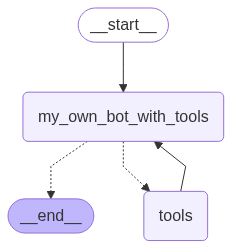

In [ ]:
# Memorysaver
# Langgraph can use a checkpoint to automatically save the graph state after each step
# This built in persistence layer gives us memory , allowing langgraph to pick from last state update
# One of teh easiest checkpoints to use is MemorySaver(), an in-memory key value store for storing graph states
# All we need to do is simply compile the graph with tehe checkpint and our graph will have memory 

# Define our LLM
from langchain_openai import ChatOpenAI
llm_openai = ChatOpenAI(model = "gpt-4o-mini")
llm_with_tools = llm_openai.bind_tools(tools)

# Create the bot 
# Step1 - Create state for agent
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]

# Step 2: Node definitions
from langgraph.graph import StateGraph, START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from IPython.display import Image,display

# Node definitions
def my_own_bot_with_tools(state: State):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

builder = StateGraph(State)

# Add nodes
builder.add_node("my_own_bot_with_tools",my_own_bot_with_tools)
builder.add_node("tools",ToolNode(tools))

#Add edges
# Edges
builder.add_edge(START,"my_own_bot_with_tools")
builder.add_conditional_edges("my_own_bot_with_tools",tools_condition)
builder.add_edge("tools","my_own_bot_with_tools")
builder.add_edge("my_own_bot_with_tools",END)

# Added these 3 lines for the agent to have memory 
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
graph_memory = builder.compile(checkpointer=memory)
display(Image(graph_memory.get_graph().draw_mermaid_png()))


In [ ]:
# Specify the thread
# Assume if you running multi user application--- u have a frontend
# so for each user u need to maintain separate memory
# each user will need to have separate threadid 
config = {"configurable":{"thread_id":"123"}}
# Specify an input
from pprint import pprint
messages = graph_memory.invoke({"messages":"Add 12 and 18 "},config=config)
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

Add 12 and 18 
================================== Ai Message ==================================
Tool Calls:
  my_add (call_L6Xwe1iMrmnAmOIGM8FGKAav)
 Call ID: call_L6Xwe1iMrmnAmOIGM8FGKAav
  Args:
    a: 12
    b: 18
================================= Tool Message =================================
Name: my_add

30
================================== Ai Message ==================================

The sum of 12 and 18 is 30.


In [9]:
messages = graph_memory.invoke({"messages":"Divide the last result by 10"},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 18 
================================== Ai Message ==================================
Tool Calls:
  my_add (call_L6Xwe1iMrmnAmOIGM8FGKAav)
 Call ID: call_L6Xwe1iMrmnAmOIGM8FGKAav
  Args:
    a: 12
    b: 18
================================= Tool Message =================================
Name: my_add

30
================================== Ai Message ==================================

The sum of 12 and 18 is 30.
================================ Human Message =================================

Divide the last result by 10
================================== Ai Message ==================================
Tool Calls:
  my_div (call_NmzJdUTlAz7mc8Dja8Lu2R9k)
 Call ID: call_NmzJdUTlAz7mc8Dja8Lu2R9k
  Args:
    a: 30
    b: 10
================================= Tool Message =================================
Name: my_div

3.0
================================== Ai Message ==================================


In [10]:
config = {"configurable":{"thread_id":"456"}}
# Specify an input
from pprint import pprint
messages = graph_memory.invoke({"messages":"Can you tell me what is Agentic RAG?"},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Can you tell me what is Agentic RAG?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_Dwdo0PI1ut17IK0baK7ZfJk7)
 Call ID: call_Dwdo0PI1ut17IK0baK7ZfJk7
  Args:
    query: Agentic RAG
================================= Tool Message =================================
Name: wikipedia

Page: Retrieval-augmented generation
Summary: Retrieval-augmented generation (RAG) is a technique that enables large language models (LLMs) to retrieve and incorporate new information. With RAG, LLMs do not respond to user queries until they refer to a specified set of documents. These documents supplement information from the LLM's pre-existing training data. This allows LLMs to use domain-specific and/or updated information that is not available in the training data. For example, this helps LLM-based chatbots access internal company data or generate responses based o

In [11]:
messages = graph_memory.invoke({"messages":"Can you write a 500 word blog on the above topic"},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Can you tell me what is Agentic RAG?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_Dwdo0PI1ut17IK0baK7ZfJk7)
 Call ID: call_Dwdo0PI1ut17IK0baK7ZfJk7
  Args:
    query: Agentic RAG
================================= Tool Message =================================
Name: wikipedia

Page: Retrieval-augmented generation
Summary: Retrieval-augmented generation (RAG) is a technique that enables large language models (LLMs) to retrieve and incorporate new information. With RAG, LLMs do not respond to user queries until they refer to a specified set of documents. These documents supplement information from the LLM's pre-existing training data. This allows LLMs to use domain-specific and/or updated information that is not available in the training data. For example, this helps LLM-based chatbots access internal company data or generate responses based o